**Submission Dicoding**

**Projek Akhir: Klasifikasi Gambar oleh Nabilah Sharfina | Mojokerto | Bergabung sejak 2019**

In [1]:
# Load data from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing Required Libraries**

In [2]:
import pandas as pd # for handling and cleaning the dataset
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import matplotlib.image as mpimg
import tensorflow as tf
import os

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from google.colab import files

## **Exploring the Dataset**

In [3]:
base_dir = '/content/drive/MyDrive/BOOTCAMP/DICODING/Belajar Machine Learning untuk Pemula/rockpaperscissors/rockpaperscissors/rps-cv-images'
paper_dir = os.path.join(base_dir,'paper')
rock_dir = os.path.join(base_dir,'rock')
scissors_dir = os.path.join(base_dir,'scissors')

In [4]:
print('Total Images of Paper    : ',len(os.listdir(paper_dir)))
print('Total Images of Rock     : ',len(os.listdir(rock_dir)))
print('Total Images of Scissors : ',len(os.listdir(scissors_dir)))

Total Images of Paper    :  712
Total Images of Rock     :  726
Total Images of Scissors :  750


## **Implementing the Augmentation Images**

In [5]:
# Implementasi image data generator
generator = ImageDataGenerator(validation_split=0.4, rescale=1/255, shear_range=0.2, zoom_range=0.2, rotation_range=20, fill_mode='nearest')

# Membagi dataset menjadi train set dan validation set
train_data = generator.flow_from_directory(base_dir, batch_size=32, target_size=(150, 150), subset='training')
val_data = generator.flow_from_directory(base_dir, batch_size=32, target_size=(150, 150), subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


## **Building the Model**

In [6]:
# Membangun arsitektur CNN dengan menggunakan model Sequential
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

In [8]:
class Callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.95):
            print("\nReached %2.2f%% accuracy, training has been stop" %(logs.get('accuracy')*100))
            self.model.stop_training = True

callbacks = Callbacks()

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
historyModel = model.fit(
    train_data,
    steps_per_epoch=25,
    epochs=20,
    validation_data=val_data,
    validation_steps=5,
    verbose=2,
    callbacks = [callbacks])

Epoch 1/20
25/25 - 65s - loss: 1.0714 - accuracy: 0.4403 - val_loss: 0.9237 - val_accuracy: 0.6000 - 65s/epoch - 3s/step
Epoch 2/20
25/25 - 61s - loss: 0.7377 - accuracy: 0.6925 - val_loss: 0.5209 - val_accuracy: 0.8188 - 61s/epoch - 2s/step
Epoch 3/20
25/25 - 55s - loss: 0.3506 - accuracy: 0.8813 - val_loss: 0.2953 - val_accuracy: 0.9062 - 55s/epoch - 2s/step
Epoch 4/20
25/25 - 54s - loss: 0.3255 - accuracy: 0.8623 - val_loss: 0.3095 - val_accuracy: 0.9312 - 54s/epoch - 2s/step
Epoch 5/20
25/25 - 59s - loss: 0.2717 - accuracy: 0.9065 - val_loss: 0.2074 - val_accuracy: 0.9500 - 59s/epoch - 2s/step
Epoch 6/20
25/25 - 55s - loss: 0.1725 - accuracy: 0.9362 - val_loss: 0.1422 - val_accuracy: 0.9500 - 55s/epoch - 2s/step
Epoch 7/20
25/25 - 56s - loss: 0.1989 - accuracy: 0.9325 - val_loss: 0.1590 - val_accuracy: 0.9438 - 56s/epoch - 2s/step
Epoch 8/20
25/25 - 54s - loss: 0.1958 - accuracy: 0.9287 - val_loss: 0.1520 - val_accuracy: 0.9500 - 54s/epoch - 2s/step
Epoch 9/20
25/25 - 53s - loss: 0

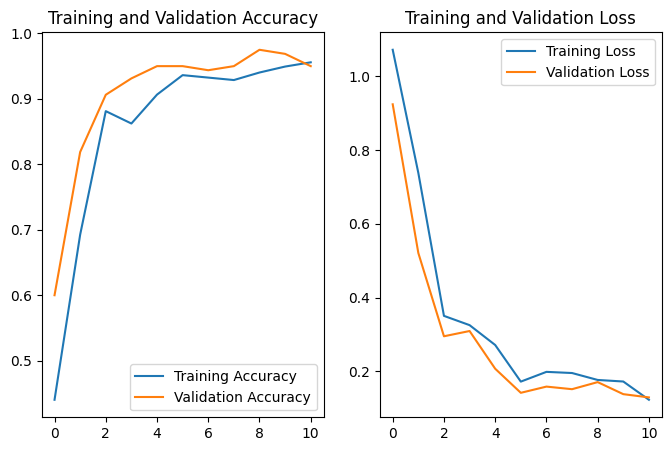

In [11]:
acc = historyModel.history['accuracy']
val_acc = historyModel.history['val_accuracy']

loss = historyModel.history['loss']
val_loss = historyModel.history['val_loss']

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **Predicting on New Data**

Saving Ze6bn38U5XECyORF.png to Ze6bn38U5XECyORF.png
1/1 [==============================] - 0s 158ms/step
Ze6bn38U5XECyORF.png
The result is: Paper


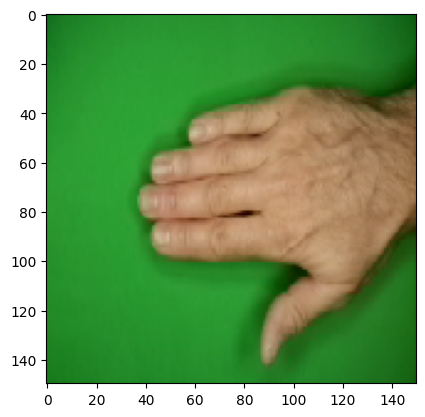

In [12]:
uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)

  if classes[0][0] == 1:
    print('The result is: Paper')
  elif classes[0][1] == 1:
    print('The result is: Rock')
  else:
    print('The result is: Scissors')